In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [3]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/RB.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error)  
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 7.2062
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 6.8005
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 6.4645
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 6.1761
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 5.8940
Epoch 6/100
110/110 [==============================] - 0s 998us/step - loss: 5.6003
Epoch 7/100
110/110 [==============================] - 0s 970us/step - loss: 5.3238
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 5.0684
Epoch 9/100
110/110 [==============================] - 0s 957us/step - loss: 4.8513
Epoch 10/100
110/110 [==============================] - 0s 933us/step - loss: 4.6671
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 4.5078
Epoch 12/100
110/110 [==============================] - 0s 1ms/step - loss: 4.3576
Epoch

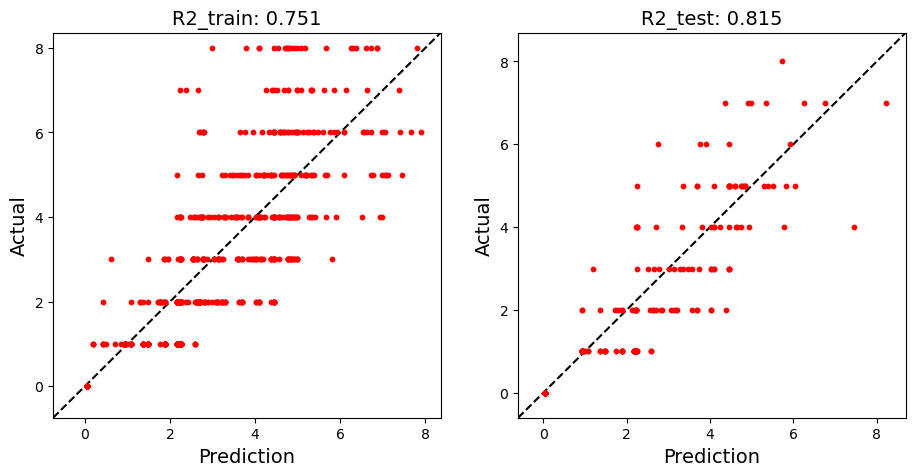

Mean Squared Error (MSE) 1.0815133948715574
Mean Absolute Error (MAE) 0.6619107371026819


In [4]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae) 
   


In [5]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 2ms/step
[[ 0.0196774 ]
 [ 0.23281491]
 [ 0.53219426]
 [ 0.9209732 ]
 [ 1.3847278 ]
 [ 1.887532  ]
 [ 2.3737235 ]
 [ 2.77673   ]
 [ 3.0335917 ]
 [ 3.1009803 ]
 [ 2.9671474 ]
 [ 0.0196774 ]
 [ 0.34790385]
 [ 0.7646431 ]
 [ 1.2495188 ]
 [ 1.7602043 ]
 [ 2.2361364 ]
 [ 2.6093006 ]
 [ 2.819869  ]
 [ 2.8318548 ]
 [ 2.6431637 ]
 [ 2.286193  ]
 [ 0.0196774 ]
 [ 0.45072222]
 [ 0.88689065]
 [ 1.2821852 ]
 [ 1.60854   ]
 [ 1.8563659 ]
 [ 2.030505  ]
 [ 2.1441813 ]
 [ 2.213314  ]
 [ 2.252562  ]
 [ 2.2733936 ]
 [ 0.0196774 ]
 [ 0.1744225 ]
 [ 0.32206106]
 [ 0.442039  ]
 [ 0.5154215 ]
 [ 0.5297648 ]
 [ 0.48256576]
 [ 0.38197553]
 [ 0.24449849]
 [ 0.0905689 ]
 [-0.06036925]
 [ 0.0196774 ]
 [ 0.1286484 ]
 [ 0.24366945]
 [ 0.35116422]
 [ 0.43581605]
 [ 0.4840771 ]
 [ 0.48770607]
 [ 0.44606912]
 [ 0.36632043]
 [ 0.2613932 ]
 [ 0.14657426]
 [ 0.0196774 ]
 [ 0.07949173]
 [ 0.1636504 ]
 [ 0.25947928]
 [ 0.35461545]
 [ 0.43949956]
 [ 0.5086231 ]
 [ 0.560456  ]
 [ 0

In [6]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.csv', index=False)